In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

crimes = pd.read_csv("./datasets/crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()


DR_NO  Date Rptd   DATE OCC TIME OCC    AREA NAME  \
0  221412410 2022-06-15 2020-11-12     1700      Pacific   
1  220314085 2022-07-22 2020-05-12     1110    Southwest   
2  222013040 2022-08-06 2020-06-04     1620      Olympic   
3  220614831 2022-08-18 2020-08-17     1200    Hollywood   
4  231207725 2023-02-27 2020-01-27     0635  77th Street   

                                       Crm Cd Desc  Vict Age Vict Sex  \
0  THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)         0      NaN   
1                                THEFT OF IDENTITY        27        F   
2                                THEFT OF IDENTITY        60        M   
3                                THEFT OF IDENTITY        28        M   
4                                THEFT OF IDENTITY        37        M   

  Vict Descent Weapon Desc  Status Desc  \
0          NaN         NaN  Invest Cont   
1            B         NaN  Invest Cont   
2            H         NaN  Invest Cont   
3            H         NaN  Invest Cont   
4            H         NaN  Invest Cont   

                                   LOCATION  
0  13600    MARINA POINT                 DR  
1   2500 S  SYCAMORE                     AV  
2   3300    SAN MARINO                   ST  
3                         1900    TRANSIENT  
4   6200    4TH                          AV

In [3]:
crimes['HOUR OCC'] = crimes['TIME OCC'].str[:2].astype(int)
crimes.head()


DR_NO  Date Rptd   DATE OCC TIME OCC    AREA NAME  \
0  221412410 2022-06-15 2020-11-12     1700      Pacific   
1  220314085 2022-07-22 2020-05-12     1110    Southwest   
2  222013040 2022-08-06 2020-06-04     1620      Olympic   
3  220614831 2022-08-18 2020-08-17     1200    Hollywood   
4  231207725 2023-02-27 2020-01-27     0635  77th Street   

                                       Crm Cd Desc  Vict Age Vict Sex  \
0  THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)         0      NaN   
1                                THEFT OF IDENTITY        27        F   
2                                THEFT OF IDENTITY        60        M   
3                                THEFT OF IDENTITY        28        M   
4                                THEFT OF IDENTITY        37        M   

  Vict Descent Weapon Desc  Status Desc  \
0          NaN         NaN  Invest Cont   
1            B         NaN  Invest Cont   
2            H         NaN  Invest Cont   
3            H         NaN  Invest Cont   
4            H         NaN  Invest Cont   

                                   LOCATION  HOUR OCC  
0  13600    MARINA POINT                 DR        17  
1   2500 S  SYCAMORE                     AV        11  
2   3300    SAN MARINO                   ST        16  
3                         1900    TRANSIENT        12  
4   6200    4TH                          AV         6

HOUR OCC
12    17065
18    14447
17    14107
20    13325
19    13146
Name: count, dtype: int64


c:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Windows\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


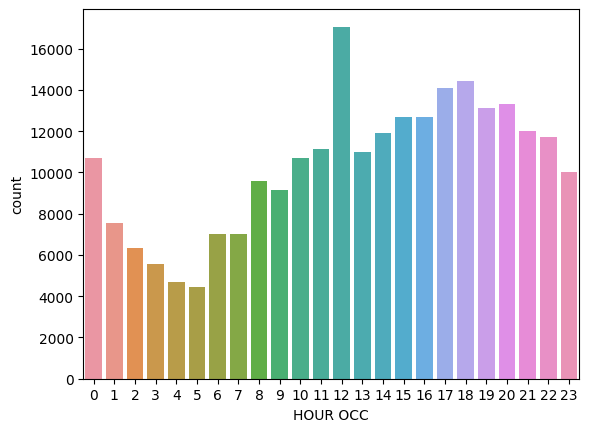

In [4]:
print(crimes['HOUR OCC'].value_counts().head())
sns.countplot(x='HOUR OCC', data=crimes)
peak_crime_hour = 12


In [5]:
night_crime = crimes[crimes['HOUR OCC'].isin([22,23,0,1,2,3])]
night_crime_location = night_crime.groupby('AREA NAME', as_index=False)['HOUR OCC'].count().sort_values('HOUR OCC', ascending=False)
print(night_crime_location.head())
print(f"The area with the most night crime is {night_crime_location.iloc[0]['AREA NAME']}")
peak_night_crime_location = "Central"


      AREA NAME  HOUR OCC
1       Central      4091
0   77th Street      3362
6     Hollywood      3299
9        Newton      2927
14    Southeast      2884
The area with the most night crime is Central


In [6]:
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["<18", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

crimes["Age Bracket"] = pd.cut(crimes["Vict Age"], bins=age_bins, labels=age_labels)

victim_ages = crimes["Age Bracket"].value_counts()
print(victim_ages)


Age Bracket
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
<18       4528
Name: count, dtype: int64
